<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [45]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)
np.random.seed(123)

Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

- What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.
- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

Feel free to experiment after submitting the project!

In [46]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [47]:
len(netflix_df)

4812

In [48]:
nineties_released = np.logical_and(netflix_df['release_year'] >= 1990,
                                   netflix_df['release_year'] <= 1999)
movies_nineties = netflix_df[nineties_released]
movies_nineties

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...
s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action


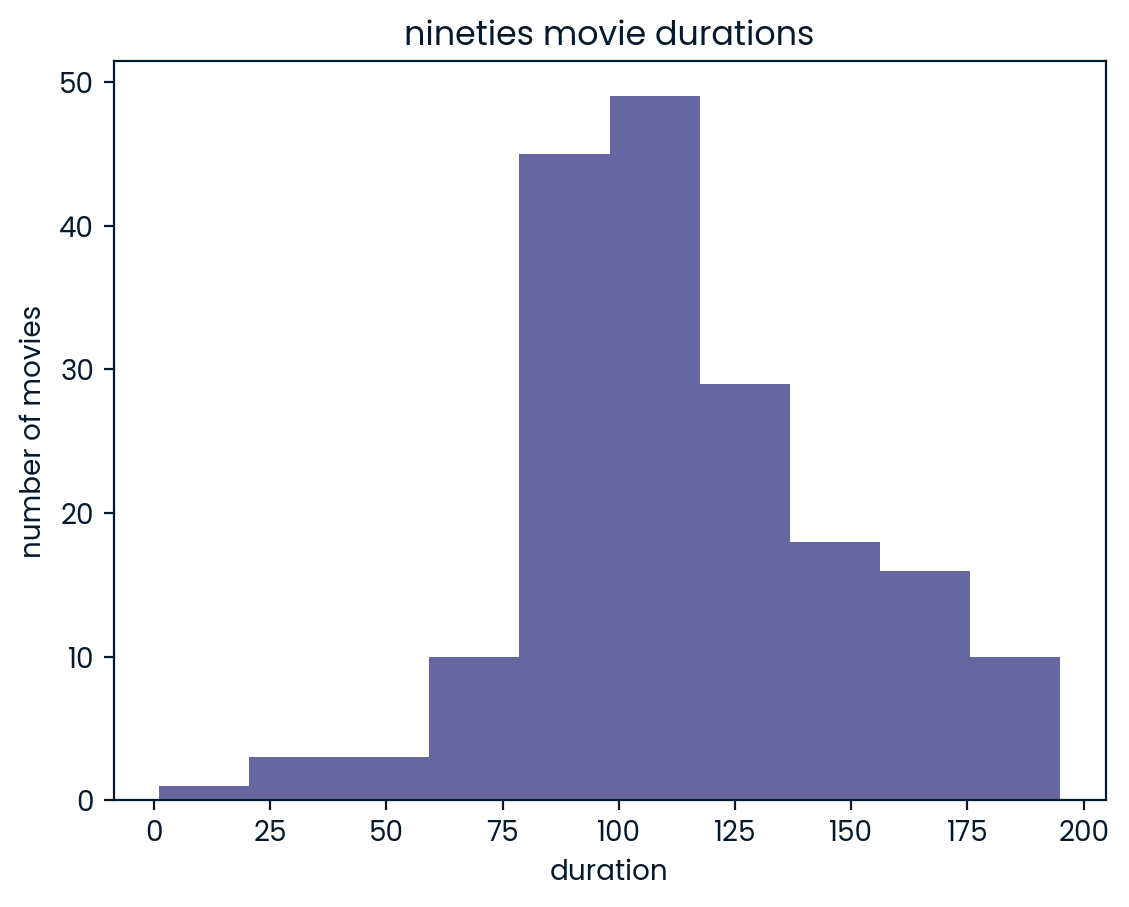

In [49]:
movie_durations = movies_nineties['duration']
plt.hist(movie_durations)
plt.title('nineties movie durations')
plt.xlabel('duration')
plt.ylabel('number of movies')
plt.show()

In [50]:
duration = 110

In [51]:
short_action_movies = movies_nineties[np.logical_and(movies_nineties['duration'] < 90, 
                                     movies_nineties['genre'] == 'Action')]
short_action_movies

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [52]:
short_movie_count = len(short_action_movies)
short_movie_count

7

Let's extend this project and work with hackers statistics as explained in the intermediate python course by Hugo Bowne-Anderson.

Two avid netflix fans are playing a game: a random movie gets picked from the netflix database and each player has to guess the duration of the movie. The player with the closest guess scores a point. Whoever reaches 100 points first wins the game. We will simulate the trajectory of the players.

There is a catch though. The first player is older and has better knowledge of movies before 1990. He vaguely knows the duration of those movies and has a probability of 50% of being no further than 15 minutes from the correct answer! The same is true for the second player, but his knowledge reaches only to movies from 2000 and onwards.

Simulate the game many times. Is one of the players consistently winning? If this happens, give an explanation by visualizing the data. Compute the probability for each player to win.

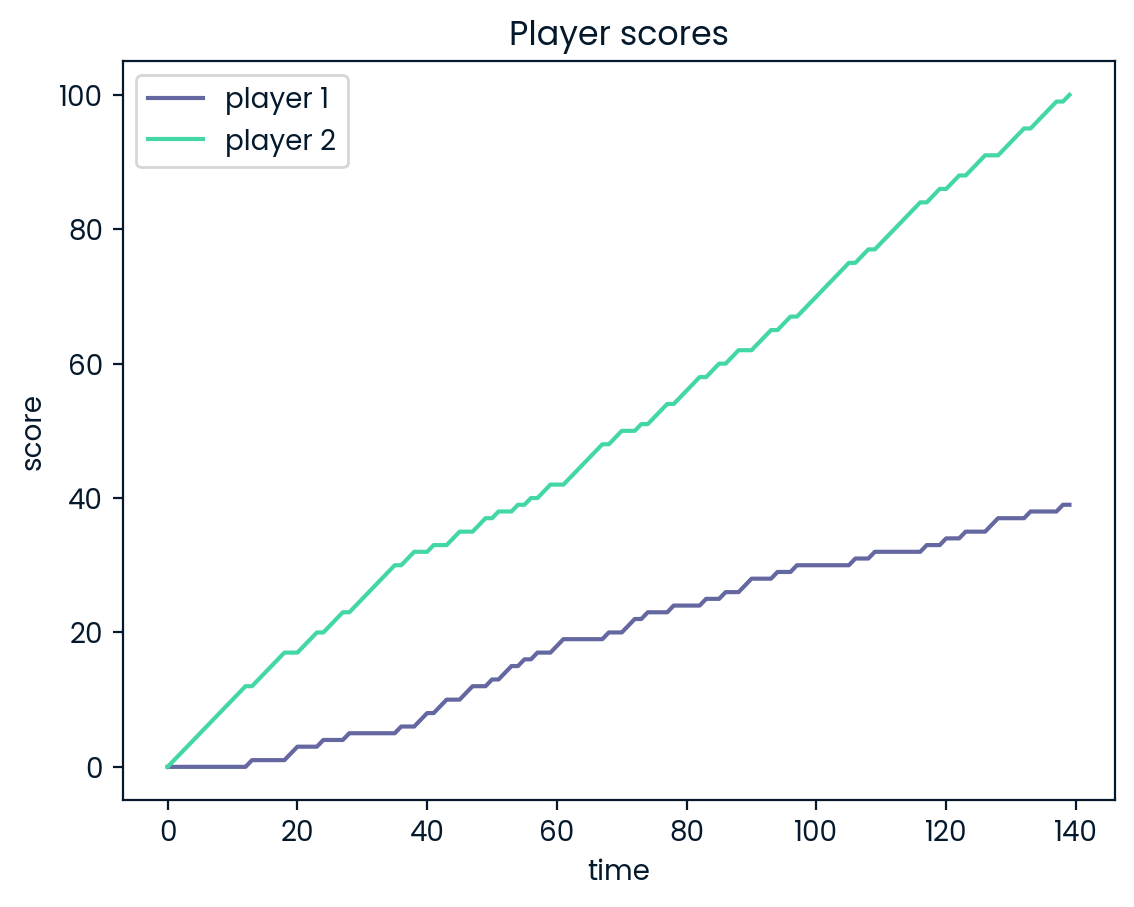

In [53]:
number_of_movies = len(netflix_df)

min_duration = min(netflix_df['duration'])
max_duration = max(netflix_df['duration'])

points_player_1 = [0]
points_player_2 = [0]

while (points_player_1[-1] != 100 and points_player_2[-1] != 100):
    movie_index = np.random.randint(number_of_movies)
    movie = netflix_df.iloc[movie_index, :]
    real_duration = movie['duration']
    
    before_1990 = movie['release_year'] < 1990
    after_2000 = movie['release_year'] >= 2000
    
    if before_1990 and np.random.rand() < 0.5:
        guess_1 = np.random.randint(real_duration - 15, real_duration + 16)
    else:
        guess_1 = np.random.randint(min_duration, max_duration + 1)
        
    if after_2000 and np.random.rand() < 0.5:
        guess_2 = np.random.randint(real_duration - 15, real_duration + 16)
    else:
        guess_2 = np.random.randint(min_duration, max_duration + 1)
        
    diff_1 = abs(guess_1 - real_duration)
    diff_2 = abs(guess_2 - real_duration)
    prev_score_1 = points_player_1[-1]
    prev_score_2 = points_player_2[-1]
    
    if diff_1 < diff_2:
        points_player_1.append(prev_score_1 + 1)
        points_player_2.append(prev_score_2)
    elif diff_1 > diff_2:
        points_player_1.append(prev_score_1)
        points_player_2.append(prev_score_2 + 1)
    else:
        points_player_1.append(prev_score_1)
        points_player_2.append(prev_score_2)
        
np_points = np.array([points_player_1, points_player_2])
np_points_t = np.transpose(np_points)

plt.plot(np_points_t)
plt.title('Player scores')
plt.xlabel('time')
plt.ylabel('score')
plt.legend(['player 1', 'player 2'])
plt.show()

We observe in a single game that player 2 is clearly winning, and by a large margin as well! Let's repeat the game 20 times and plot the score of player 1. Does he never reach 100?

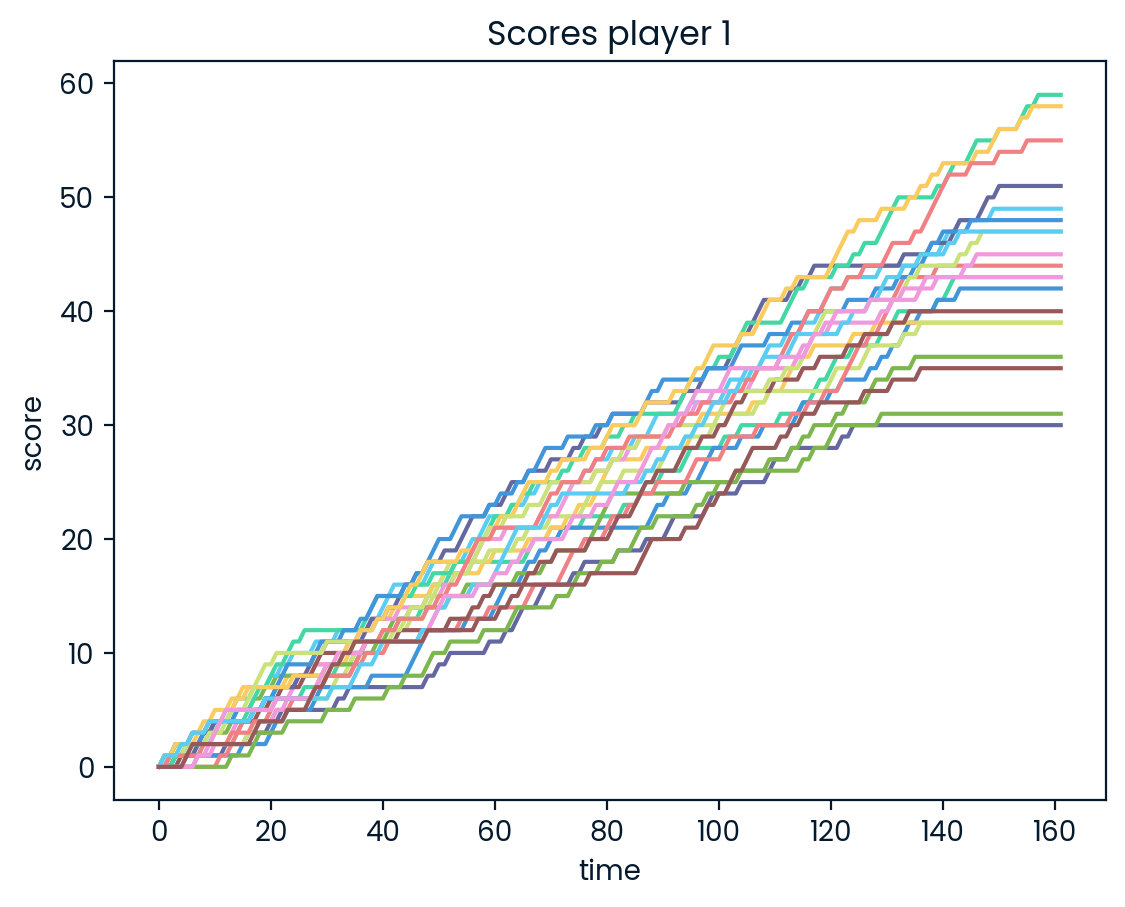

In [54]:
import numpy as np
import matplotlib.pyplot as plt

number_of_movies = len(netflix_df)

min_duration = min(netflix_df['duration'])
max_duration = max(netflix_df['duration'])

all_games_player_1 = []

for i in range(20):
    points_player_1 = [0]
    points_player_2 = [0]

    while (points_player_1[-1] != 100 and points_player_2[-1] != 100):
        movie_index = np.random.randint(number_of_movies)
        movie = netflix_df.iloc[movie_index, :]
        real_duration = movie['duration']

        before_1990 = movie['release_year'] < 1990
        after_2000 = movie['release_year'] >= 2000

        if before_1990 and np.random.rand() < 0.5:
            guess_1 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_1 = np.random.randint(min_duration, max_duration + 1)

        if after_2000 and np.random.rand() < 0.5:
            guess_2 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_2 = np.random.randint(min_duration, max_duration + 1)

        diff_1 = abs(guess_1 - real_duration)
        diff_2 = abs(guess_2 - real_duration)
        prev_score_1 = points_player_1[-1]
        prev_score_2 = points_player_2[-1]

        if diff_1 < diff_2:
            points_player_1.append(prev_score_1 + 1)
            points_player_2.append(prev_score_2)
        elif diff_1 > diff_2:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2 + 1)
        else:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2)
    
    all_games_player_1.append(points_player_1)

# Ensure all lists in all_games_player_1 are of the same length
max_length = max(len(game) for game in all_games_player_1)
for game in all_games_player_1:
    while len(game) < max_length:
        game.append(game[-1])

np_all_games = np.array(all_games_player_1)
np_all_games_t = np.transpose(np_all_games)

plt.plot(np_all_games_t)
plt.title('Scores player 1')
plt.xlabel('time')
plt.ylabel('score')
plt.show()

We see that player 1 never wins in any of the 20 games played. Why is that?

If the two players were not to have their knowledge about the respective subsets of movies, their likelihoods of winning the game should be equal. We can see this likelihood in following symetric model.

In [55]:
games_won_player_1 = []

for i in range(1000):
    points_player_1 = [0]
    points_player_2 = [0]

    while (points_player_1[-1] != 100 and points_player_2[-1] != 100):
        movie_index = np.random.randint(number_of_movies)
        movie = netflix_df.iloc[movie_index, :]
        real_duration = movie['duration']

        guess_1 = np.random.randint(min_duration, max_duration + 1)
        guess_2 = np.random.randint(min_duration, max_duration + 1)

        diff_1 = abs(guess_1 - real_duration)
        diff_2 = abs(guess_2 - real_duration)
        prev_score_1 = points_player_1[-1]
        prev_score_2 = points_player_2[-1]

        if diff_1 < diff_2:
            points_player_1.append(prev_score_1 + 1)
            points_player_2.append(prev_score_2)
        elif diff_1 > diff_2:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2 + 1)
        else:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2)
    
    has_won = points_player_1[-1] == 100
    games_won_player_1.append(has_won)
np.count_nonzero(games_won_player_1)/1000

0.51

The experiment says player 1 has 51% chance of winning the game. Aside of the small factor of randomness in favour of player 1, we can safely assume player 1 and player 2 have 50% chance of winning the game without specialized knowledge. Let's now return to the original experiment.

In [56]:
games_won_player_1 = []

for i in range(1000):
    points_player_1 = [0]
    points_player_2 = [0]

    while (points_player_1[-1] != 100 and points_player_2[-1] != 100):
        movie_index = np.random.randint(number_of_movies)
        movie = netflix_df.iloc[movie_index, :]
        real_duration = movie['duration']

        before_1990 = movie['release_year'] < 1990
        after_2000 = movie['release_year'] >= 2000

        if before_1990 and np.random.rand() < 0.5:
            guess_1 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_1 = np.random.randint(min_duration, max_duration + 1)

        if after_2000 and np.random.rand() < 0.5:
            guess_2 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_2 = np.random.randint(min_duration, max_duration + 1)

        diff_1 = abs(guess_1 - real_duration)
        diff_2 = abs(guess_2 - real_duration)
        prev_score_1 = points_player_1[-1]
        prev_score_2 = points_player_2[-1]

        if diff_1 < diff_2:
            points_player_1.append(prev_score_1 + 1)
            points_player_2.append(prev_score_2)
        elif diff_1 > diff_2:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2 + 1)
        else:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2)
    
    has_won = points_player_1[-1] == 100
    games_won_player_1.append(has_won)
    
np.count_nonzero(games_won_player_1)/1000

0.0

Yes, with the specialized knowledge of the players, player 1 has 0% chance of winning. What an unlucky outcome for this player!

Could the distribution of the release years be the culprit?

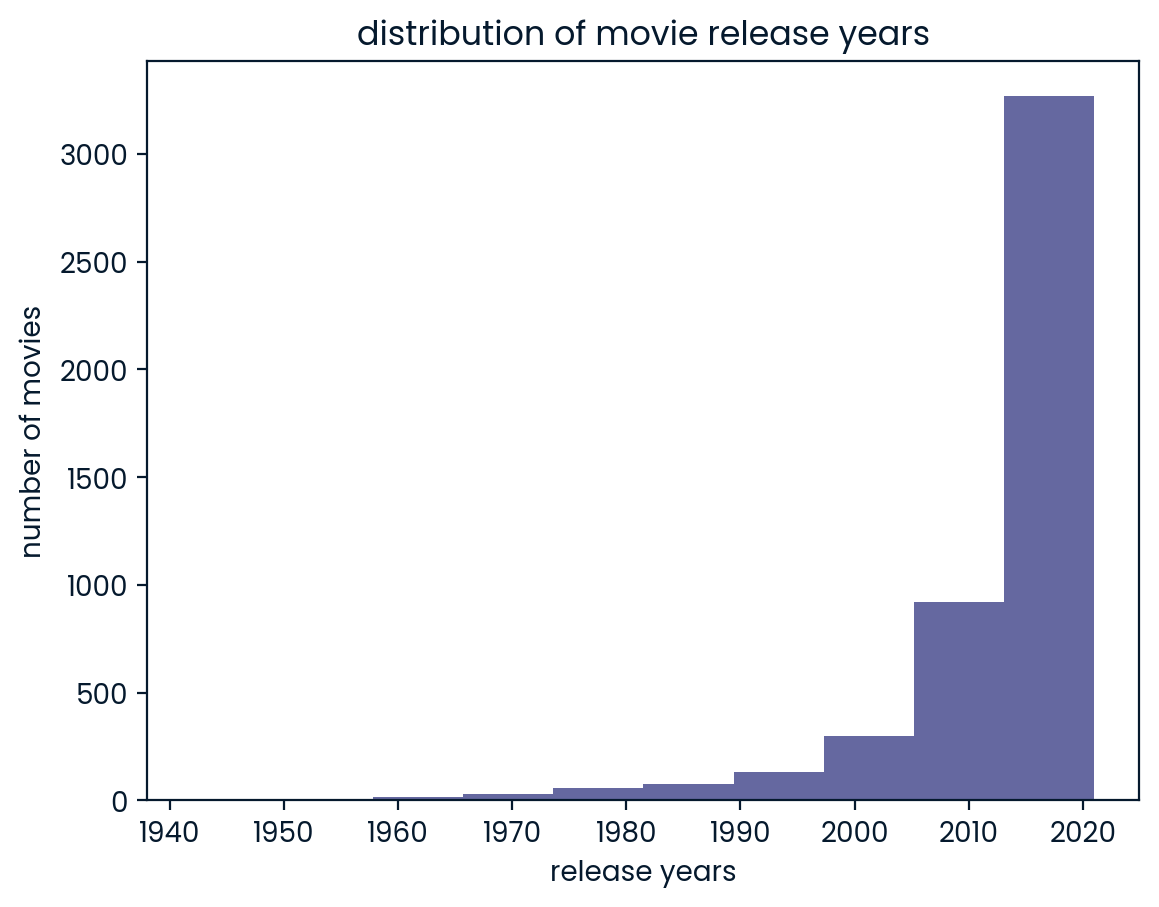

In [59]:
release_years = netflix_df['release_year']

plt.hist(release_years)
plt.title('distribution of movie release years')
plt.xlabel('release years')
plt.ylabel('number of movies')
plt.show()

Indeed! We observe that only in the last twenty years movies where released! We make many more movies today than in the previous century. Or at least, netflix only hosts recent movies, that is. Naturally player 2 will be equiped with vastly more knowledge to win the game.

Let's create a small dataset of movies with equally many favourable movies for each player.

In [64]:
movies_before_1990 = netflix_df[netflix_df['release_year'] < 1990]
movies_after_2000 = netflix_df[netflix_df['release_year'] >= 2000]
new_movie_dataset = pd.concat([movies_before_1990.head(10), movies_after_2000.head(10)])
new_movie_dataset

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...",Denmark,"October 1, 2019",1989,93,"Hoping to help their dissident parents, two br...",Dramas
s154,Movie,A Bridge Too Far,Richard Attenborough,"Dirk Bogarde, James Caan, Michael Caine, Sean ...",United States,"July 1, 2020",1977,176,This wartime drama details a pivotal day in 19...,Action
s166,Movie,A Clockwork Orange,Stanley Kubrick,"Malcolm McDowell, Patrick Magee, Michael Bates...",United Kingdom,"November 1, 2020",1971,137,In this dark satire from director Stanley Kubr...,Classic Movies
s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",1988,95,"After reckless teens kill an Amish child, a pr...",Dramas
s268,Movie,Aakhri Adaalat,Rajiv Mehra,"Vinod Khanna, Dimple Kapadia, Jackie Shroff, S...",India,"September 1, 2017",1988,148,An intrepid police inspector forced into a des...,Action
s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,"October 1, 2011",1986,96,"After their child was abducted and murdered, J...",Dramas
s382,Movie,Alexandria ... Why?,Youssef Chahine,"Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, ...",Egypt,"June 18, 2020",1979,131,"Living in Alexandria during World War II, an E...",Classic Movies
s383,Movie,Alexandria: Again and Forever,Youssef Chahine,"Youssef Chahine, Yousra, Hussein Fahmy, Amr Ab...",France,"June 18, 2020",1989,109,"At the peak of his career, Yehia joins a hunge...",Classic Movies
s392,Movie,Alibaba Aur 40 Chor,"Latif Faiziyev, Umesh Mehra","Dharmendra, Hema Malini, Zeenat Aman, Rolan By...",Soviet Union,"January 15, 2018",1980,147,A simple village man is thrown into a web of p...,Action


Repeat the experiment as intended. Does player 1 have more luck this time?

In [65]:
games_won_player_1 = []

for i in range(1000):
    points_player_1 = [0]
    points_player_2 = [0]

    while (points_player_1[-1] != 100 and points_player_2[-1] != 100):
        movie_index = np.random.randint(20)
        movie = new_movie_dataset.iloc[movie_index, :]
        real_duration = movie['duration']

        before_1990 = movie['release_year'] < 1990
        after_2000 = movie['release_year'] >= 2000

        if before_1990 and np.random.rand() < 0.5:
            guess_1 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_1 = np.random.randint(min_duration, max_duration + 1)

        if after_2000 and np.random.rand() < 0.5:
            guess_2 = np.random.randint(real_duration - 15, real_duration + 16)
        else:
            guess_2 = np.random.randint(min_duration, max_duration + 1)

        diff_1 = abs(guess_1 - real_duration)
        diff_2 = abs(guess_2 - real_duration)
        prev_score_1 = points_player_1[-1]
        prev_score_2 = points_player_2[-1]

        if diff_1 < diff_2:
            points_player_1.append(prev_score_1 + 1)
            points_player_2.append(prev_score_2)
        elif diff_1 > diff_2:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2 + 1)
        else:
            points_player_1.append(prev_score_1)
            points_player_2.append(prev_score_2)
    
    has_won = points_player_1[-1] == 100
    games_won_player_1.append(has_won)
    
np.count_nonzero(games_won_player_1)/1000

0.475

Player 1 has now 47.5% chance of winning the game. If the distribution of movies were fair, this really WOULD be a fun game to play!